In this notebook I'll compare two different representation of the Wisconsin Breast Cancer dataset, one done by Scatter plot and the other - by ICC plot.

Link to dataset: [here](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

# Part 1: Loading the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("./data/breast_cancer_wisconsin.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

The data was extracted from computerized images of a Fine Needle Aspiration biopsy (FNA) taken from cells suspected of being breast cancer (FNA includes the extraction of tissue parts or cells through the insertion of a needle).

An illustration of the digitized picture (from the [first paper that used the dataset](https://www.researchgate.net/publication/2512520_Nuclear_Feature_Extraction_For_Breast_Tumor_Diagnosis)):


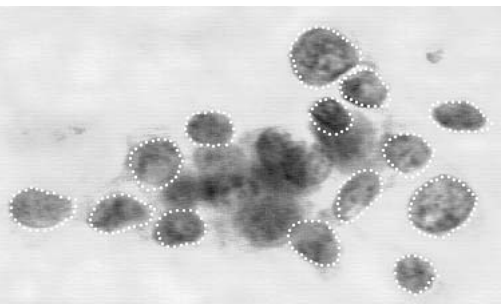

The data contains the following attributes:

* **id**.
* **Diagnosis** – M for Malignant and B for Benign.
* **measures** - 10 measures describing the cell.

The 10 measures are:

1. **radius** - the average distance from the center of the cell to its circumference.
2. **texture** - according to the gray values in the image.
3. **perimeter**.
4. **area**.
5. **Smoothness** - how smooth the cell is according to the different radius lengths.
6. **compactness**.
7. **concavity** - the percentage of concavity in the contours of the cell.
8. **concave points** – the number of concave points present in the outline of the cell.
9. **symmetry**.
10. **fractal dimension** - you can read more about it [here](https://en.wikipedia.org/wiki/Fractal_dimension).

For each of these 10 measures, 3 attributes were produced:

* **mean** – the average value.
* **se** – standard deviation.
* **worst** – the average of the three highest values measured for the measure.

For example, we can find the attributes:  radius_mean, radius _se, radius_worst.

Therefore, all and all, there are 10 X 3 attributes for each sample (excluding its id and diagnosis).

It is evident, then, that all the attributes are quantitative variables - continuous numbers, except for the id and the diagnosis.



# Part 2: Data processing

In [3]:
df.drop(columns = ['id', 'Unnamed: 32'], inplace=True) # remove redundent column (note: in Unnamed all values are null)

In [4]:
df['diagnosis']=df['diagnosis'].replace({'B':0, 'M':1})
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

# Part 3: Analyzing the data using Scatter plots

As the data has 30 attributes (10 to each category: Mean, SE and Words), I'll split the scatter plots to 3 subsections accordingly.

In [5]:
attributes = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension']

### Mean Attributes

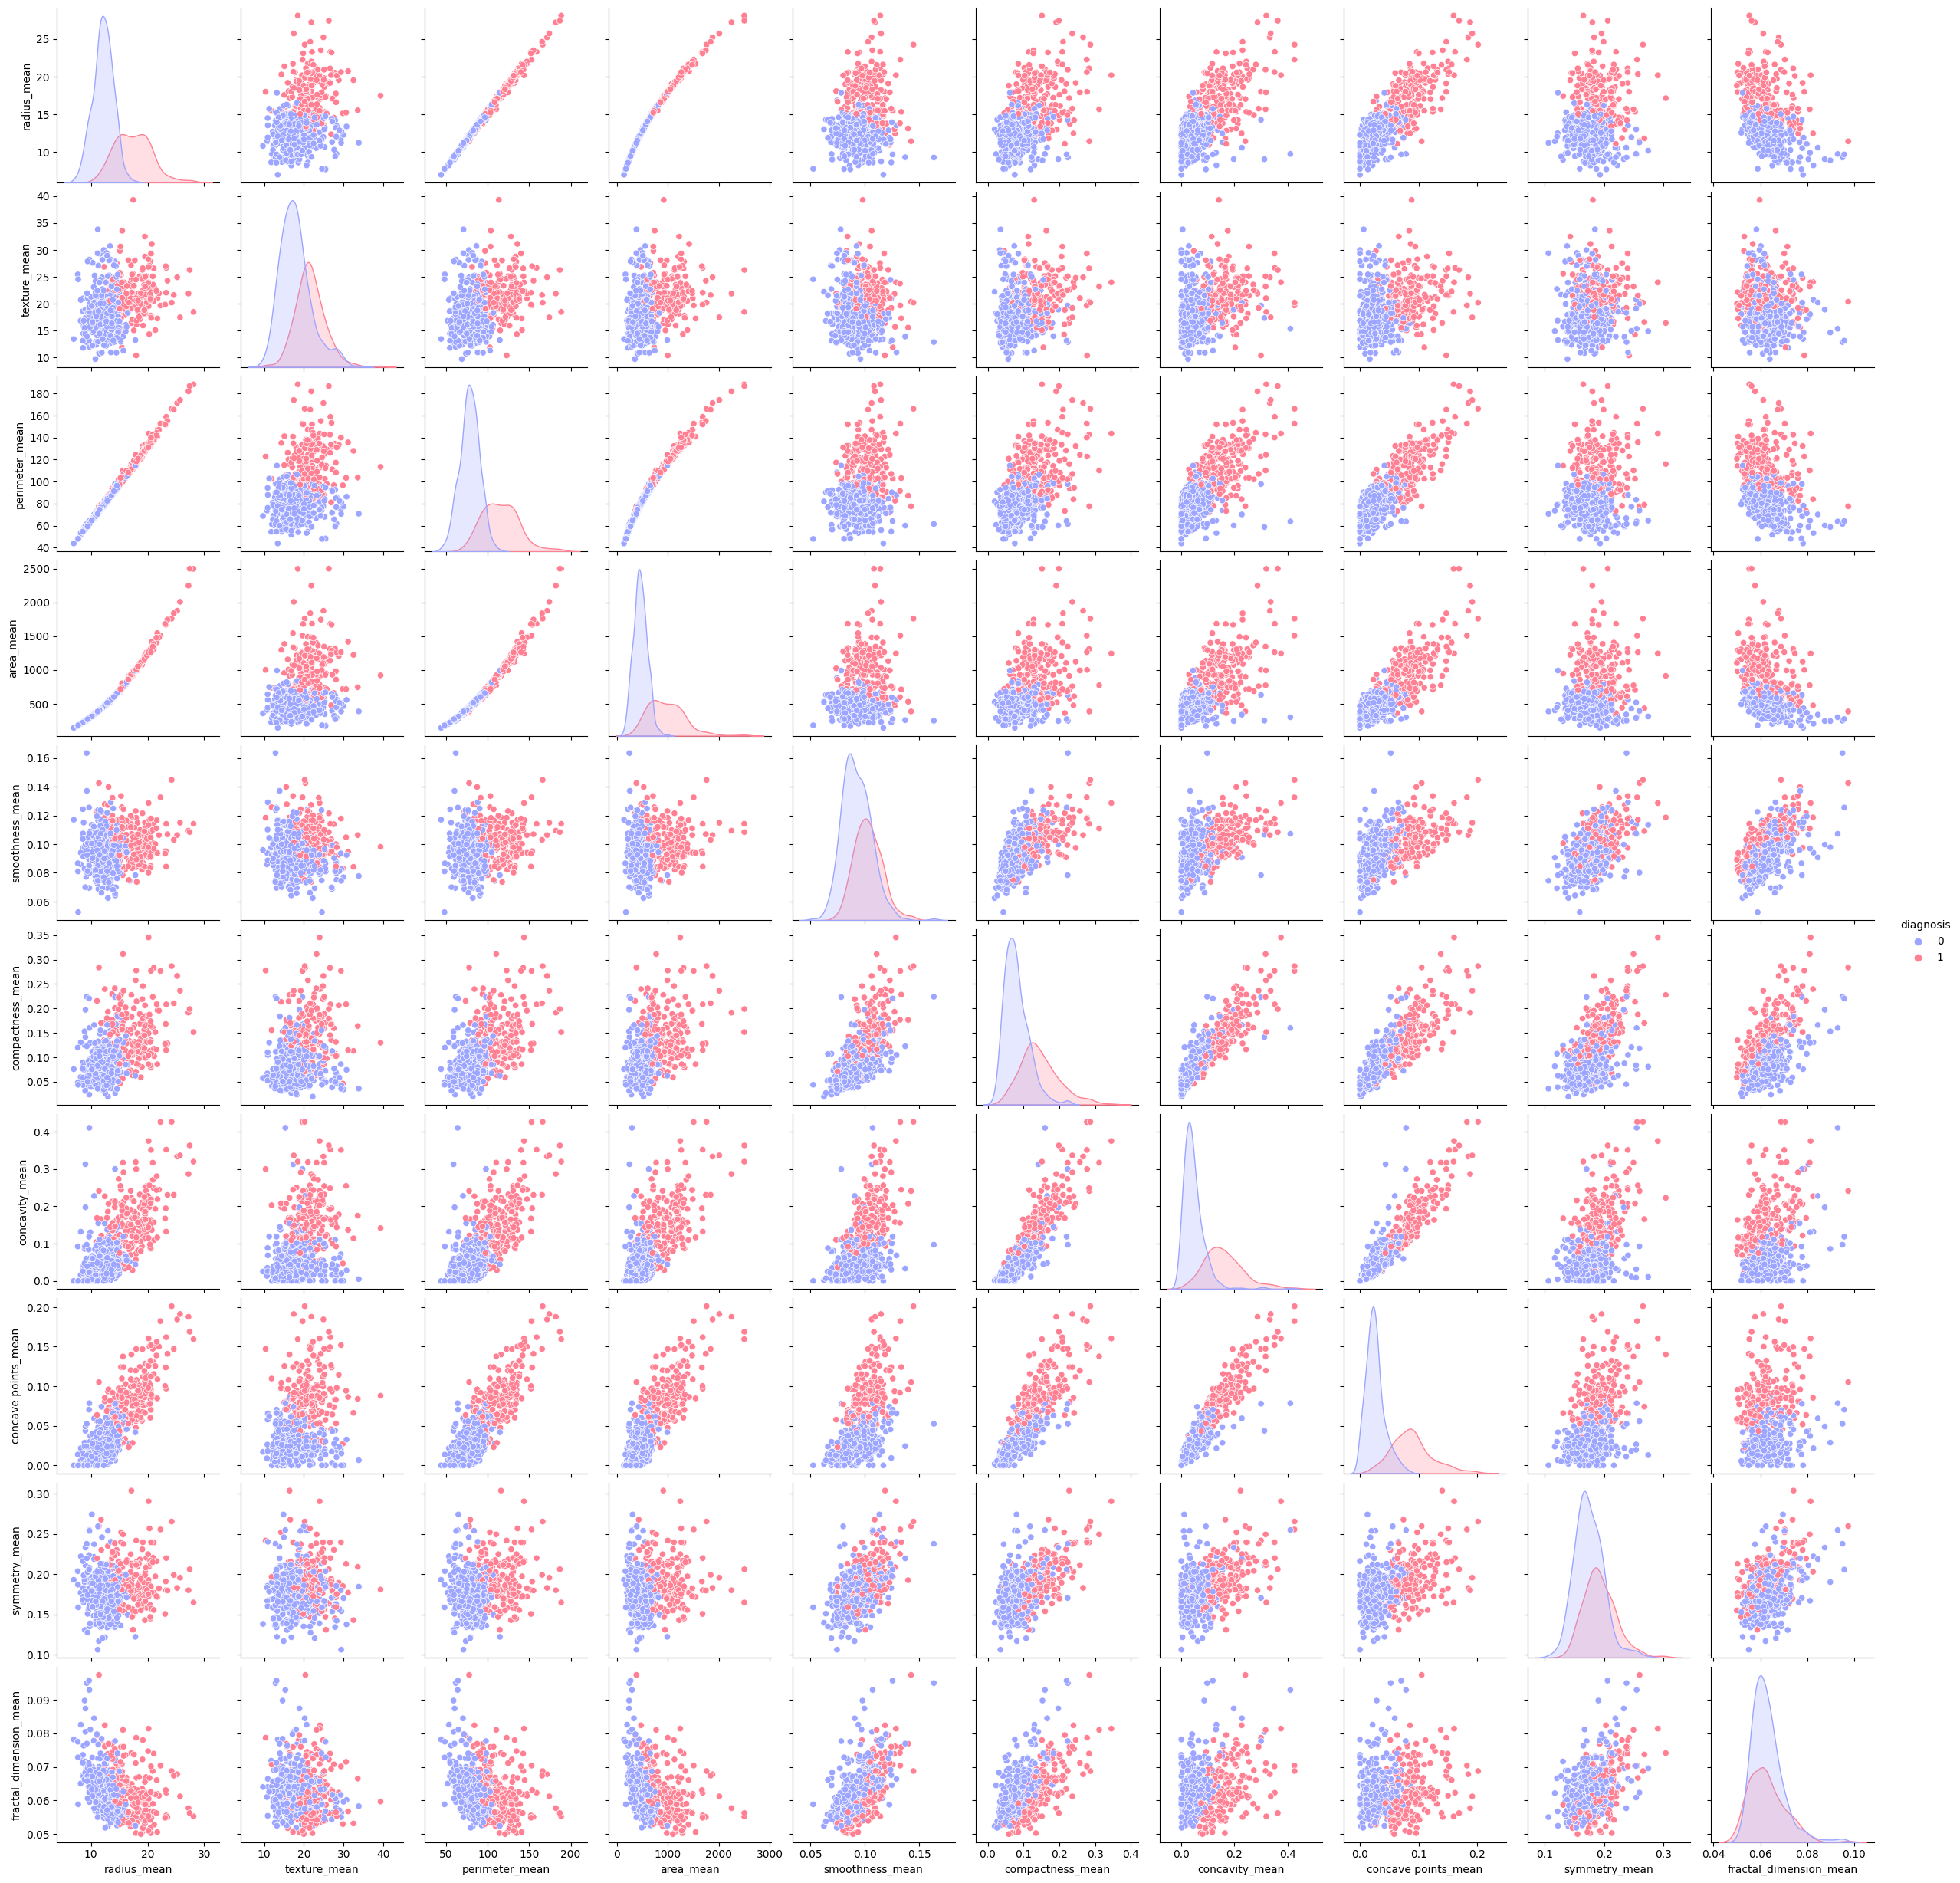

In [6]:
mean_df = df[[att + '_mean' for att in attributes] + ['diagnosis']]
sns.pairplot(mean_df, hue="diagnosis", palette = {0: '#9ca5ff', 1: '#ff8093'})

### SE Attributes

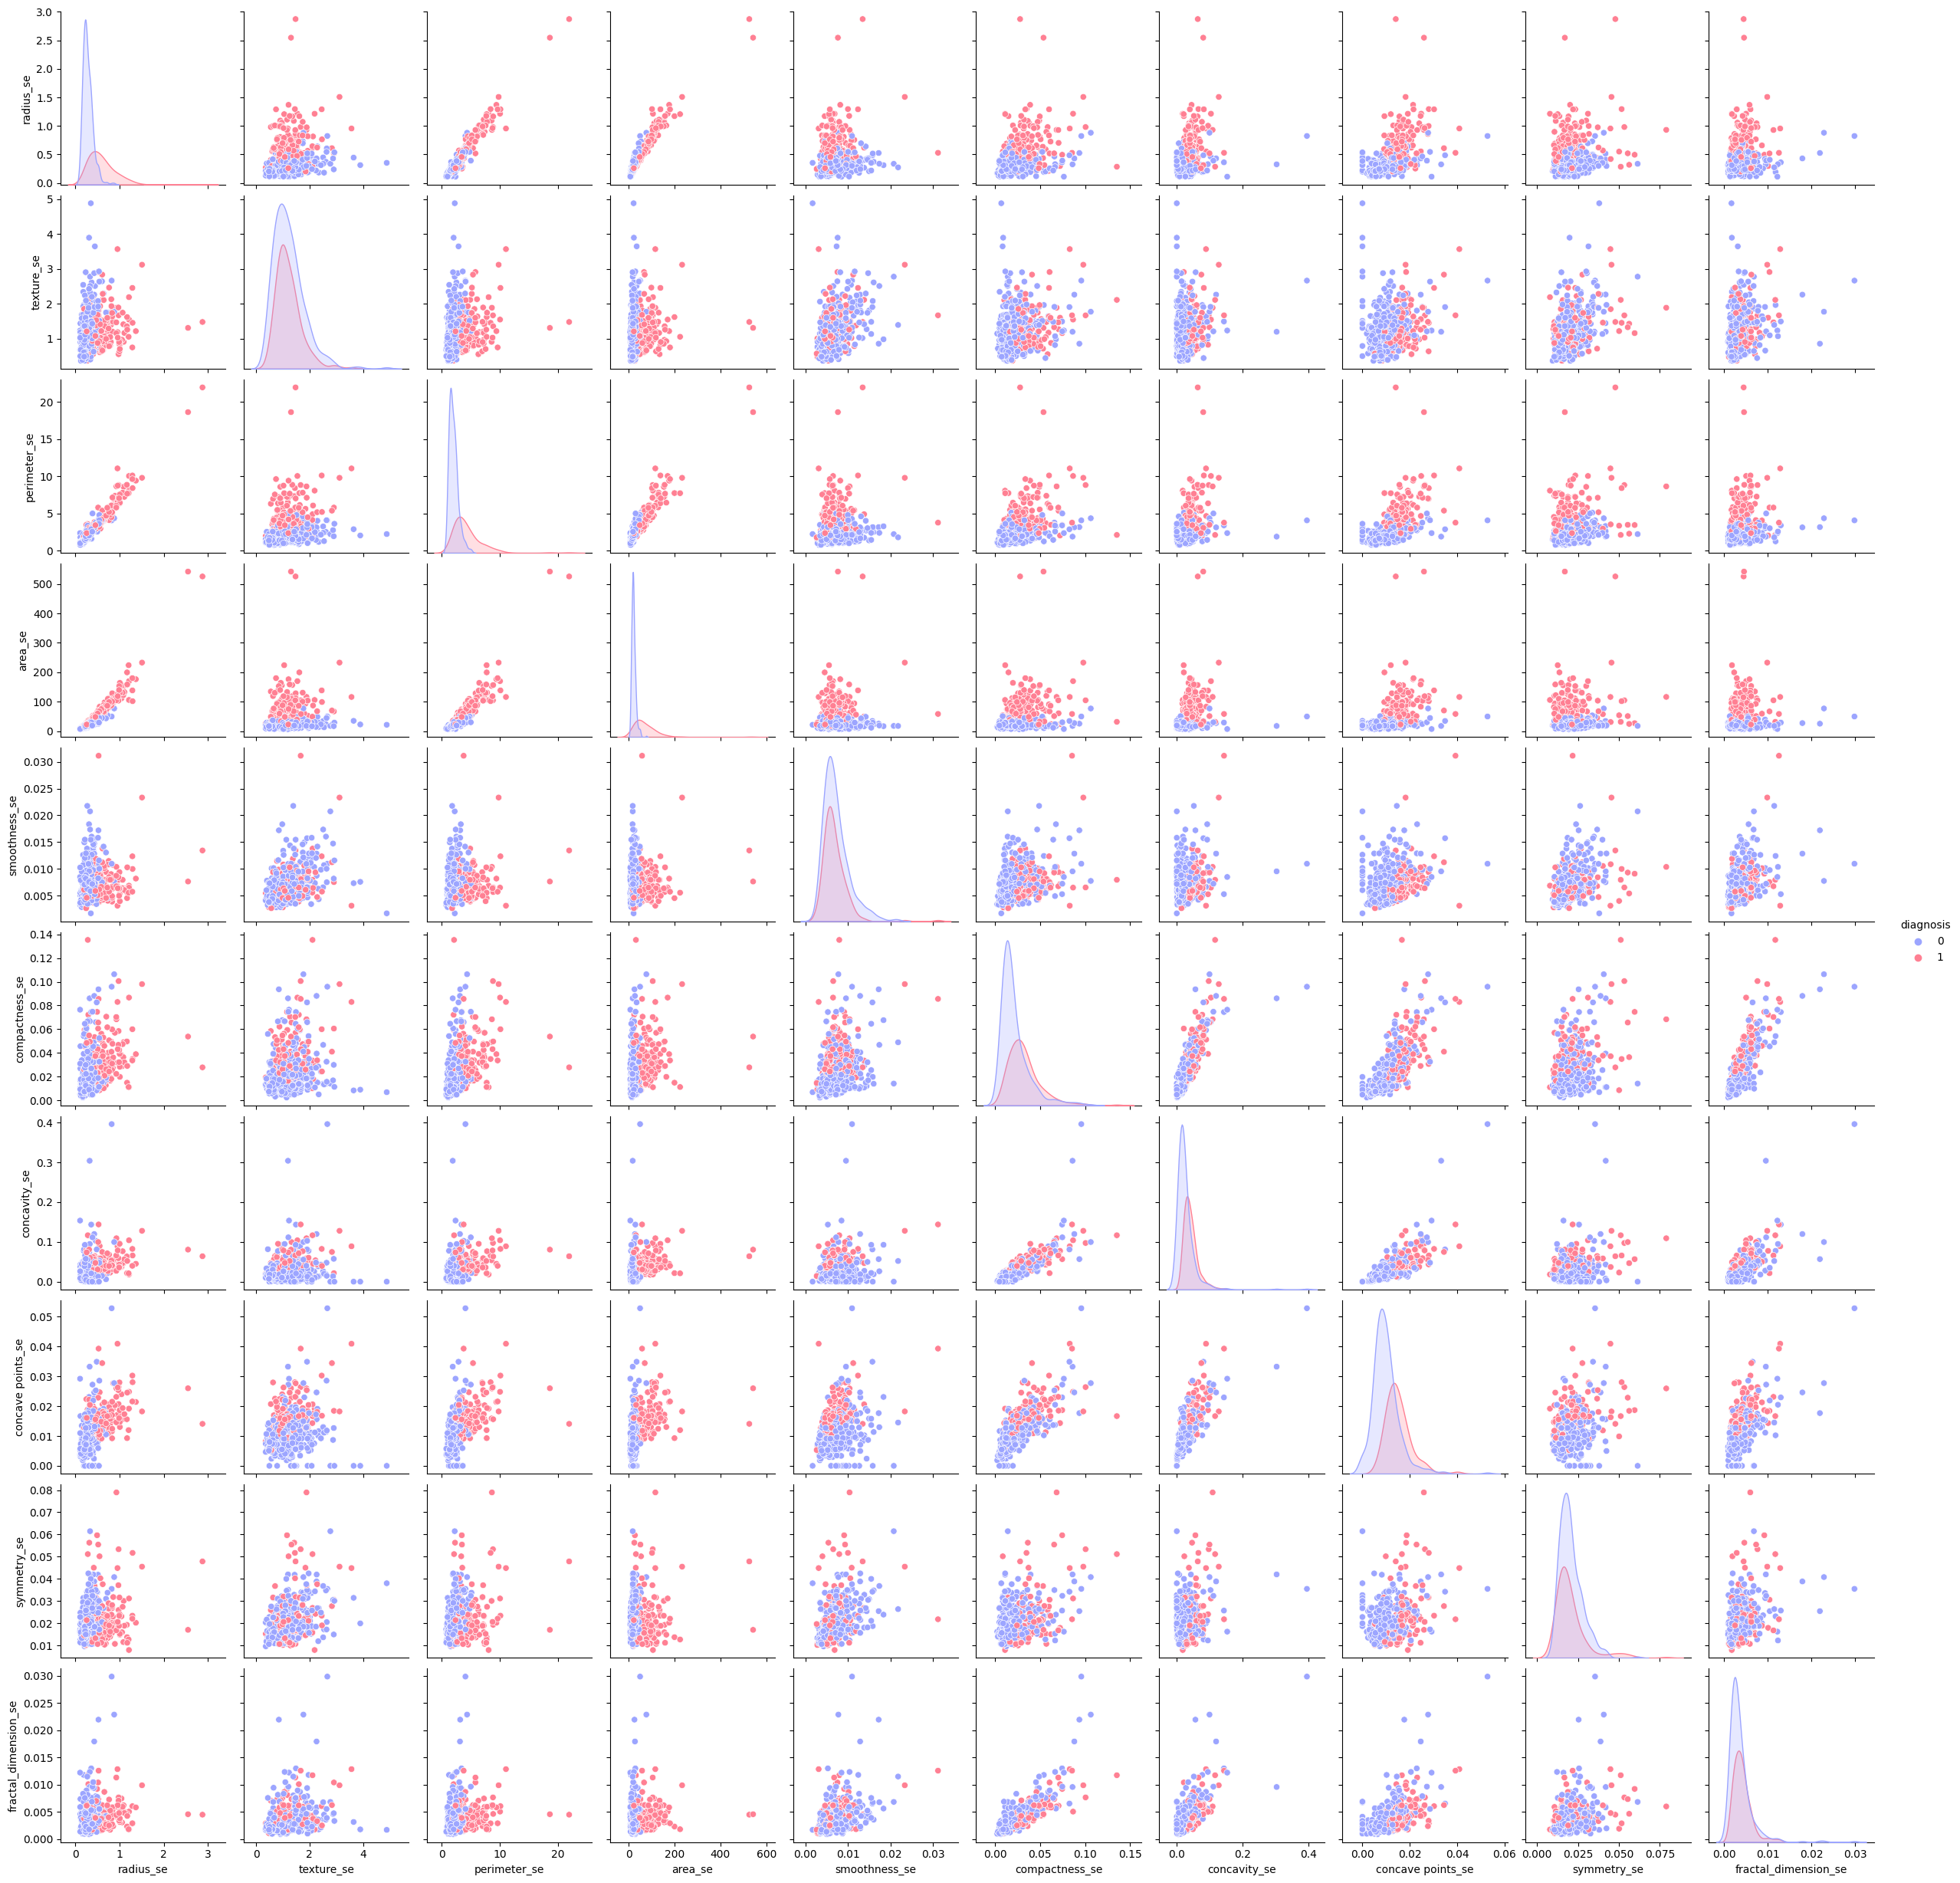

In [7]:
se_df = df[[att + '_se' for att in attributes] + ['diagnosis']]
sns.pairplot(se_df, hue="diagnosis", palette = {0: '#9ca5ff', 1: '#ff8093'})

### Worst Attributes

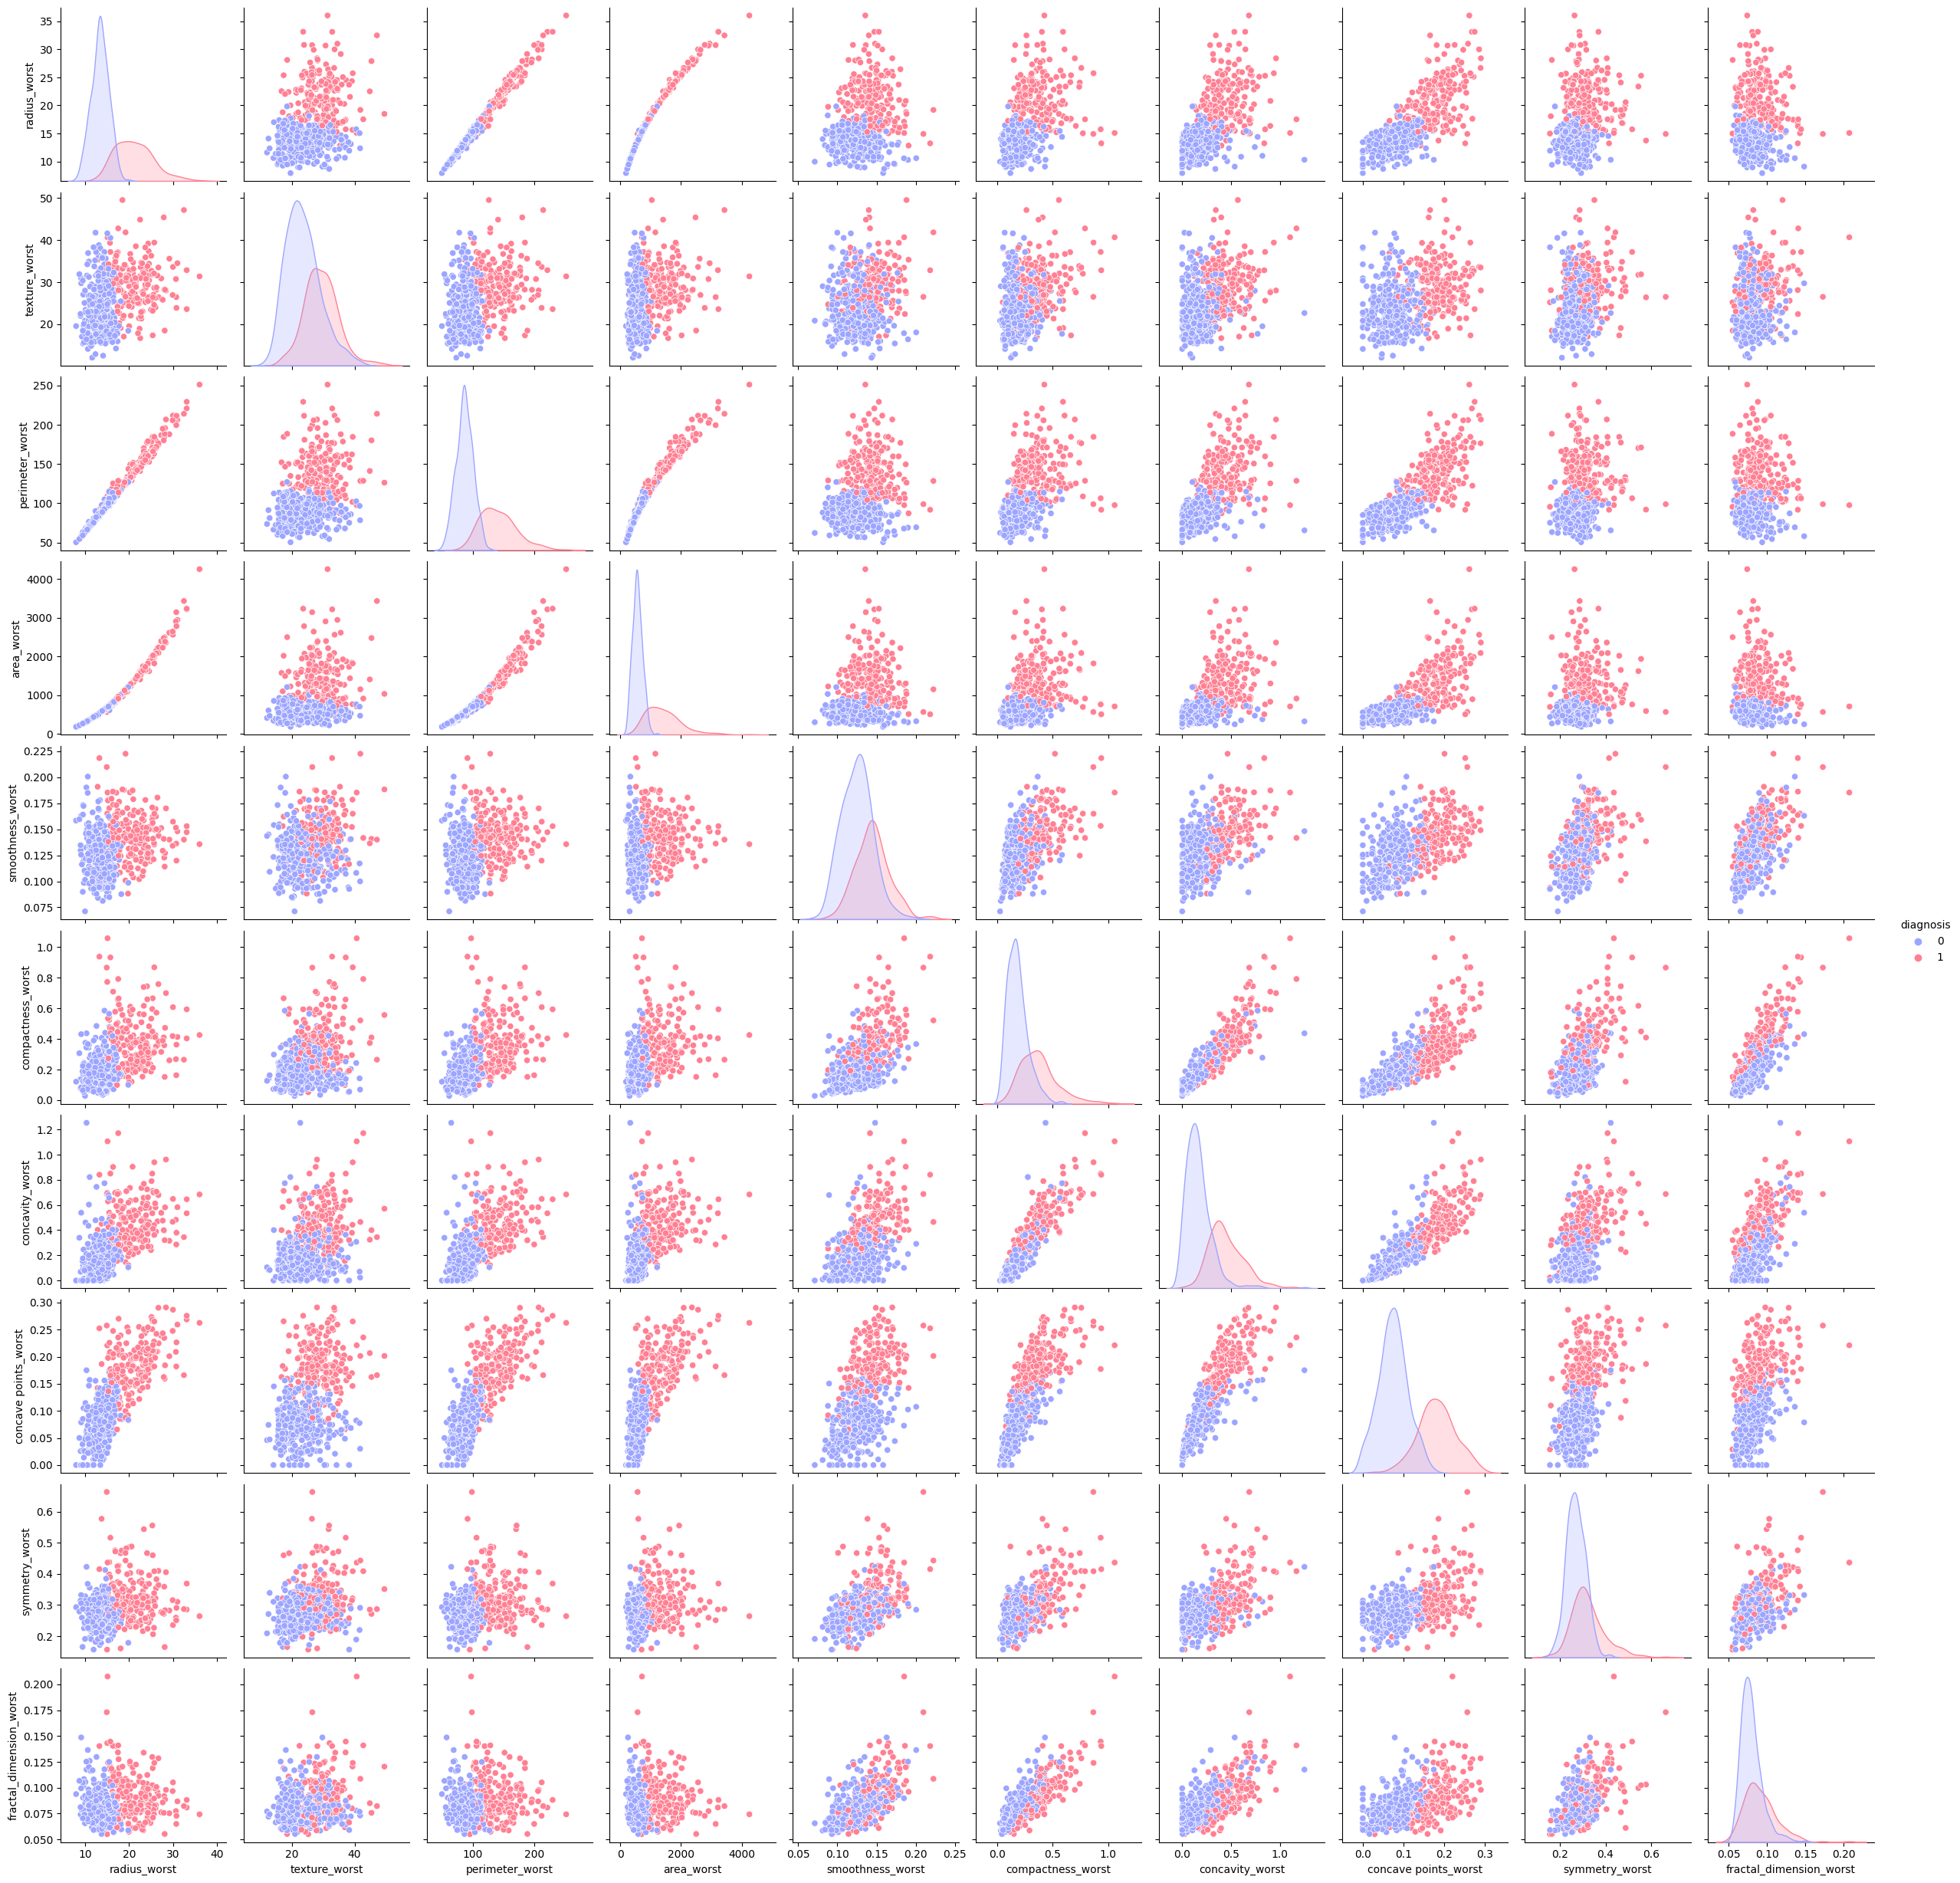

In [8]:
worst_df = df[[att + '_worst' for att in attributes] + ['diagnosis']]
sns.pairplot(worst_df, hue="diagnosis", palette = {0: '#9ca5ff', 1: '#ff8093'})

# Part 4: Analyzing the data using ICC plots

In the following code, I'll present how ICC will handle this plots.

In [9]:
#@title Press here to load ICC code

import numpy as np
import graphviz
import matplotlib.colors as mc
import re
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from PIL import Image

PRESENT_ALL = 'all'
PRESENT_VISITED = 'visited'
PRESENT_MISCLASSIFIED = 'misclassified'

##################
## Graphvitz utils

replace_words = ['<thead>', '<tbody>', '</thead>', '</tbody>', '\n', '\rn', '<table border="1" class="dataframe">',
                 '</table>']
pattern = '|'.join(replace_words)

def dataframe_to_graphviz_table(df):
    '''
    Translates a html table to graphviz format
    references:
    https://renenyffenegger.ch/notes/tools/Graphviz/attributes/label/HTML-like/index
    https://graphviz.org/Gallery/gradient/table.html
    '''
    html_table = df.to_html()
    return re.sub(pattern, '', html_table).replace('th', 'td').replace('<td>', '<td border="1" bgcolor = "white">')

def to_graphviz_format(node_header, cm):
    cm_table = dataframe_to_graphviz_table(cm)
    return '<<table border = "0">' \
           '<tr><td border = "0" colspan="3"><b>%s</b></td></tr>' \
            '%s' \
           '</table>>' % (node_header, cm_table)

####################
def create_legend (expected_label, predicted_label, expected_label_color, predicted_label_color,
                   present_legends_header):
    elc = color_to_hex(expected_label_color)
    plc = color_to_hex(predicted_label_color)
    if present_legends_header:
        return f'<<table border = "0">' \
               f'<tr><td border = "1" bgcolor= "{elc}"> expected label </td> \
                    <td border = "1" bgcolor= "{plc}"> predicted label </td></tr>' \
               f'<tr><td border = "1" bgcolor= "{elc}"> {expected_label} </td> \
                    <td border = "1" bgcolor= "{plc}"> {predicted_label} </td></tr>' \
               f'</table>>'
    else:
        return f'<<table border = "0">' \
               f'<tr><td border = "1" bgcolor= "{elc}"> {expected_label} </td> \
                    <td border = "1" bgcolor= "{plc}"> {predicted_label} </td></tr>' \
               f'</table>>'

def create_cm_for_node(tp, fp, tn, fn, true_label, false_label):
    if tp == 0 and fp == 0 and tn == 0 and fn == 0:
        return None
    else:
        return pd.DataFrame({false_label: [tn, fn], true_label: [fp, tp]}, index = [false_label,true_label])

def get_nodes_visits_count_list(n_nodes, node_indicator, samples_ids):
    visits_count = [0] * n_nodes
    for sample_id in samples_ids:
        # obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
        node_indexes = node_indicator.indices[
                     node_indicator.indptr[sample_id]: node_indicator.indptr[sample_id + 1]
                     ]
        for node_index in node_indexes:
            visits_count[node_index] += 1
    return visits_count

def color_to_hex(color):
    try:
        color = mc.cnames[color]
    except:
        pass
    return color

def merge_color(first_color, first_color_quantity, second_color, second_color_quantity):
    if first_color_quantity == 0 and second_color_quantity == 0:
        return 'white'
    else:
        fc = color_to_hex(first_color)
        sc = color_to_hex(second_color)
        fc_rgb = tuple(int(fc.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))
        sc_rgb = tuple(int(sc.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))
        total = first_color_quantity + second_color_quantity
        adjusted_r = round((first_color_quantity * fc_rgb[0] + second_color_quantity * sc_rgb[0]) / total)
        adjusted_g = round((first_color_quantity * fc_rgb[1] + second_color_quantity * sc_rgb[1]) / total)
        adjusted_b = round((first_color_quantity * fc_rgb[2] + second_color_quantity * sc_rgb[2]) / total)
        return '#%02x%02x%02x' % (adjusted_r, adjusted_g, adjusted_b)

def plot_misclassification_in_tree(clf, X, y, expected_label, predicted_label,
                                   expected_label_color, predicted_label_color,
                                   present_legends_header = True,
                                   show_cm = True, present = PRESENT_ALL,
                                   highlight_false_negative = True,
                                   present_misclassification = True,
                                   im_size = 1000):
    y = np.array(y)  # Will be easier if y is guaranteed to be of type np array
    v = graphviz.Digraph()

    v.node(str(-1), create_legend(expected_label, predicted_label, expected_label_color, predicted_label_color, present_legends_header),
           {'shape': 'component', 'style': 'filled', 'fillcolor': 'white'})

    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    classification = clf.predict(X)
    node_indicator = clf.decision_path(X)

    # Step 1: check how the true data traverse along the classifier
    expected_label_labeled_samples_ids = [i for i in range(len(X)) if y[i] == expected_label]
    predicted_label_labeled_samples_ids = [i for i in range(len(X)) if y[i] == predicted_label]

    expected_label_labeled_visit_count = get_nodes_visits_count_list(n_nodes, node_indicator, expected_label_labeled_samples_ids)
    predicted_label_labeled_visits_count = get_nodes_visits_count_list(n_nodes, node_indicator, predicted_label_labeled_samples_ids)

    # Step 2: inspect how the classifier would classify the samples - and create a confusion marix for it.
    true_positive_samples_ids = [i for i in range(len(X)) if
                                 y[i] == expected_label and classification[i] == expected_label]
    false_positive_samples_ids = [i for i in range(len(X)) if
                                  y[i] == predicted_label and classification[i] == expected_label]
    true_negative_samples_ids = [i for i in range(len(X)) if
                                 y[i] == predicted_label and classification[i] == predicted_label]
    false_negative_samples_ids = [i for i in range(len(X)) if
                                  y[i] == expected_label and classification[i] == predicted_label]

    tp_visits_count = get_nodes_visits_count_list(n_nodes, node_indicator, true_positive_samples_ids)
    fp_visits_count = get_nodes_visits_count_list(n_nodes, node_indicator, false_positive_samples_ids)
    tn_visits_count = get_nodes_visits_count_list(n_nodes, node_indicator, true_negative_samples_ids)
    fn_visits_count = get_nodes_visits_count_list(n_nodes, node_indicator, false_negative_samples_ids)

    if PRESENT_ALL == present:
        nodes_ids_to_plot = range(n_nodes)
    elif PRESENT_VISITED == present:
        total_visits_count = [sum(x) for x in zip(tp_visits_count, fp_visits_count, tn_visits_count, fn_visits_count)]
        nodes_ids_to_plot = [i for i in range(len(total_visits_count)) if total_visits_count[i] > 0]
    elif PRESENT_MISCLASSIFIED == present:
        nodes_ids_to_plot = [i for i in range(len(fn_visits_count)) if fn_visits_count[i] > 0]
    else:
        raise Exception('Uknown present value: %s' % present)

    for i in nodes_ids_to_plot:
        node_id = str(i)

        if children_left[i] == children_right[i]: # this is a leaf
            label = str(clf.classes_[np.argmax(clf.tree_.value[i])])
            if show_cm:
                cm = create_cm_for_node(tp_visits_count[i], fp_visits_count[i], tn_visits_count[i], fn_visits_count[i], expected_label, predicted_label)
                if cm is None:
                    node_content = label
                else:
                    node_content = to_graphviz_format(label, cm)
            else:
                node_content = label
            peripheries = '2' if highlight_false_negative and fn_visits_count[i] > 0 else '1'
            fill_color = merge_color(expected_label_color, expected_label_labeled_visit_count[i], predicted_label_color, predicted_label_labeled_visits_count[i])
            v.node(node_id, node_content, {'shape': 'rect', 'style': 'filled', 'fillcolor': fill_color, 'peripheries': peripheries})

        else: # this is a split node
            node_feature = X.columns[feature[i]]
            node_tresshold = threshold[i]

            label = str(node_feature)
            if show_cm:
                cm = create_cm_for_node(tp_visits_count[i], fp_visits_count[i], tn_visits_count[i], fn_visits_count[i], expected_label, predicted_label)
                if cm is None:
                    node_content = label
                else:
                    node_content = to_graphviz_format(label, cm)
            else:
                node_content = label

            fill_color = merge_color(expected_label_color, expected_label_labeled_visit_count[i], predicted_label_color, predicted_label_labeled_visits_count[i])
            peripheries = '2' if highlight_false_negative and fn_visits_count[i] > 0 else '1'
            v.node(node_id, node_content, {'shape': 'rect', 'style': 'filled', 'fillcolor': fill_color, 'peripheries': peripheries})

            if children_left[i] in nodes_ids_to_plot:
                v.edge(node_id, str(children_left[i]), node_feature + "<=" + str(round(node_tresshold, 5)))
            if children_right[i] in nodes_ids_to_plot:
                v.edge(node_id, str(children_right[i]), node_feature + ">" + str(round(node_tresshold, 5)))
    if present_misclassification:
        v.node(str(n_nodes), f'Total misclassification: {len(false_negative_samples_ids)}/{len(X)}',  {'shape': 'underline'}) # TODO replace with existing conut
    
    # v.render(directory='doctest-output', view=True, format='jpeg')
    output_path = v.render(format = 'jpg')
    im = Image.open(output_path) 
      
    # resize the image for better presentation 
    width, height = int(im.width / im.height * im_size), im_size
    im_resized = im.resize((width, height))
    return im_resized

def visualize(X, y, label1, label2, label1_color, label2_color, show_cm = True, max_depth = None, im_size = 1000):
    clf = DecisionTreeClassifier(random_state=42) if max_depth is None else  DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X, y)
    return plot_misclassification_in_tree(clf = clf, X = X, y = y, expected_label = label1, predicted_label = label2,
                                   expected_label_color = label1_color, predicted_label_color = label2_color,
                                   present_legends_header = False,
                                   show_cm = show_cm, present = PRESENT_ALL,
                                   highlight_false_negative = False,
                                   present_misclassification = False,
                                   im_size = im_size)

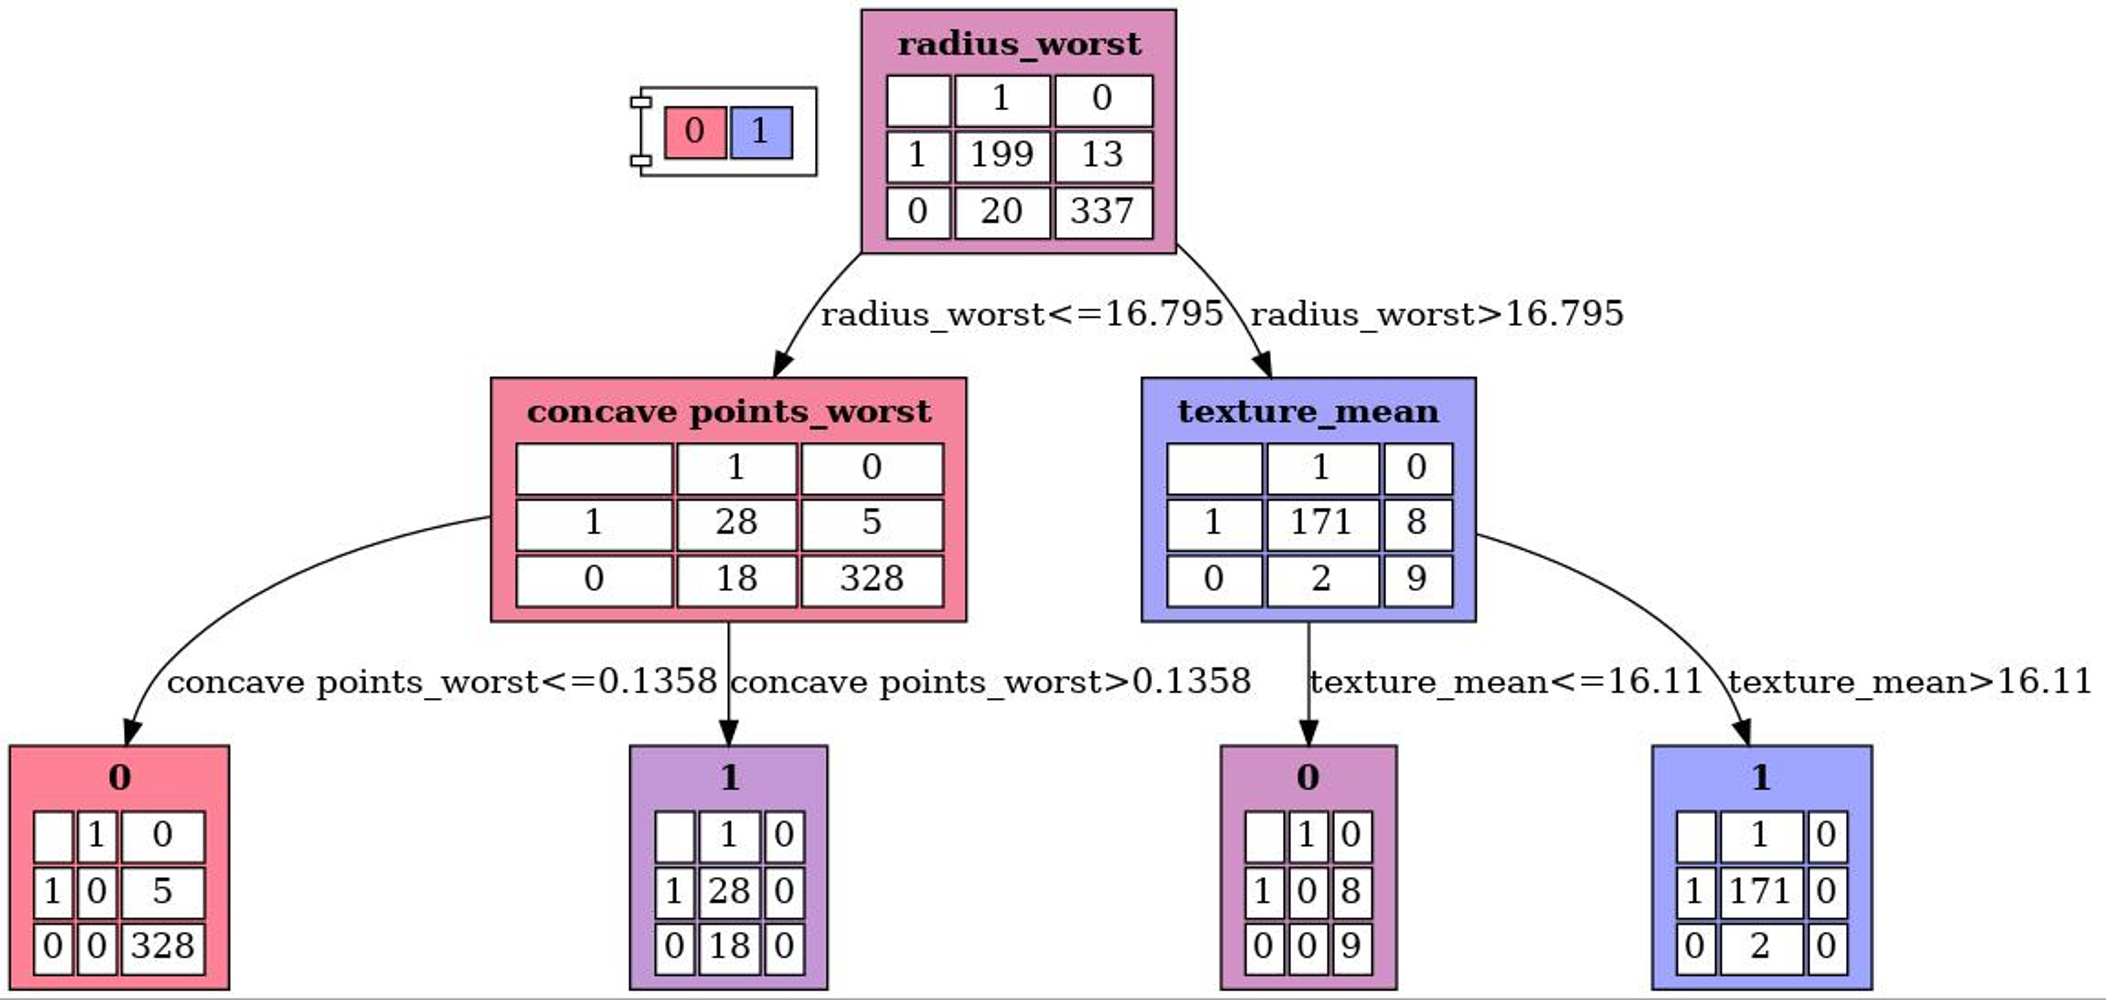

In [10]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
visualize(X, y, 0, 1, '#ff8093', '#9ca5ff', show_cm = True, max_depth = 2, im_size = 1000)

We observe a rough separation between the two classes, with some overlap between them. Additionally, there are 5 samples of class 1 that appear with a group of 325 samples of class 0, and 2 samples of class 0 that appear with a group of 171 samples of class 1. These cases could potentially be considered outliers or some other type of data abnormality.

By increasing the resolution (done by setting the max_depth varible to a higher value) we can see that in both of this cases, the samples reside in a very small subplain. In the Scatter plot graph this will end up with overplotting.

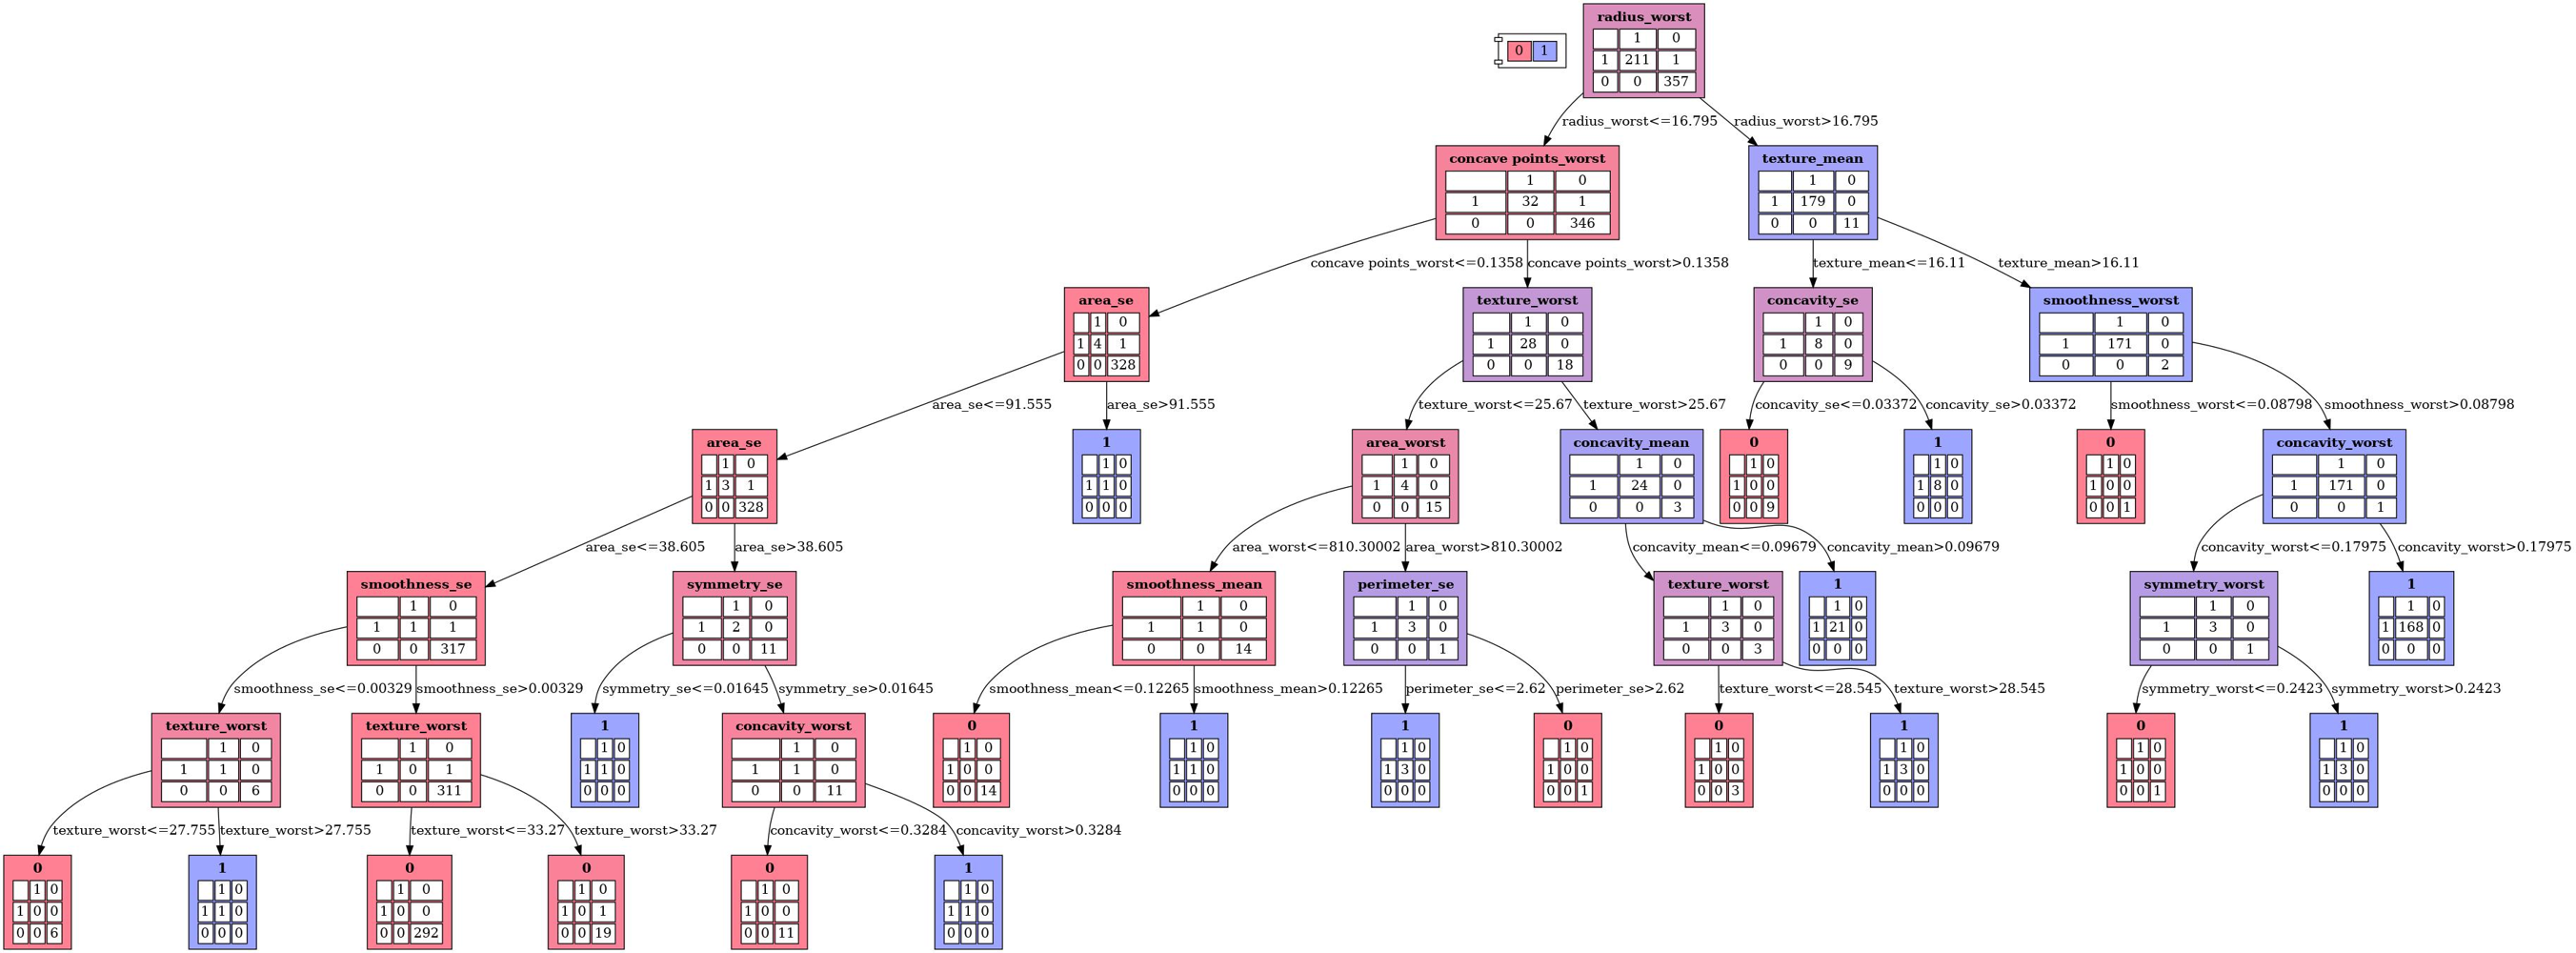

In [11]:
visualize(X, y, 0, 1, '#ff8093', '#9ca5ff', show_cm = True, max_depth = 6, im_size = 1000)

Zooming in to the subplain where 5 samples of class 1 appeared with a group of 328 samples of class 0:



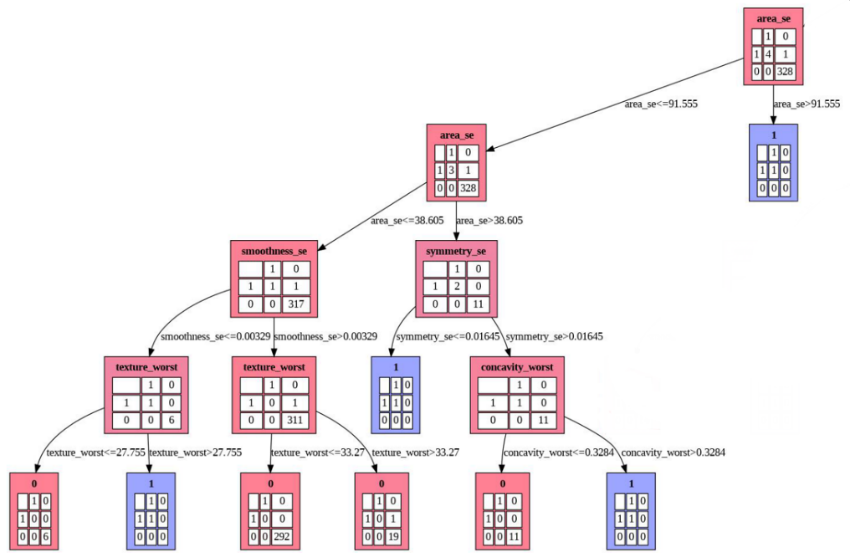

Zooming in to the subplain where 2 samples of class 0 appeared with a group of 171 samples of class 1:

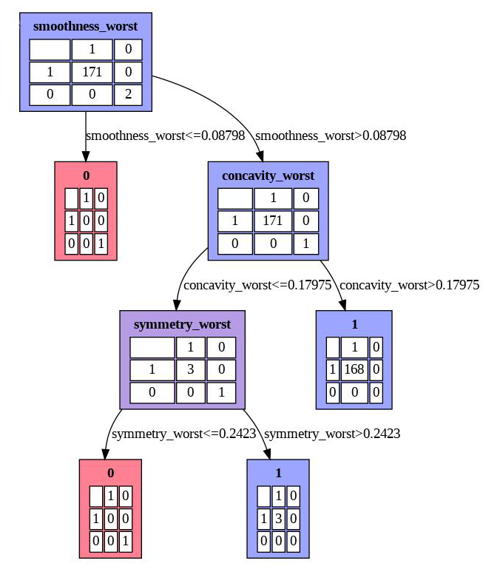

we can see that overplotting might occur in the overlapping area of the two classes. For example, it has a subplain containining 14 samples of class 0 and only one of class 1: 

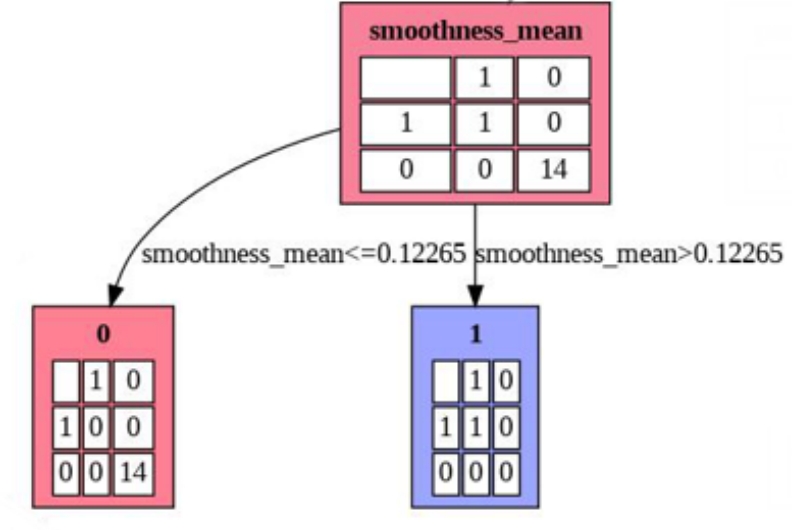